### 0.0 Problem statement:

- This data set consists of the marks secured by the students in various subjects.
- Let's try to understand the influence of the parents background, test preparation etc on students performance.

### 0.1 Data collection

Data source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [4]:
#library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


### 1.0 Reading the dataset

In [ ]:


data = pd.read_csv('data/StudentsPerformance.csv')
data.shape

(1000, 8)

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1.1 Datatype check

In [ ]:
# datatype check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 1.2 Null check

In [25]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

- No null values

### 1.3 Duplicate check

In [21]:
# duplicate check

data.duplicated().sum()

np.int64(0)

- No duplicate records

### 1.4 Unique values in the columns

In [29]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 1.5 stats

In [28]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- The mean and the median are nearly equal, Hence no outliers.


In [19]:
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    print("--------")
    print(col)
    print("--------")
    print(data[col].value_counts())
   

--------
gender
--------
gender
female    518
male      482
Name: count, dtype: int64
--------
race/ethnicity
--------
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
--------
parental level of education
--------
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
--------
lunch
--------
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
--------
test preparation course
--------
test preparation course
none         642
completed    358
Name: count, dtype: int64


### 2.0 Dataset information 

- gender : student's geder --> male or female

- race/ethnicity : ethnicity of the students -->(Group A,B,C,D,E)

- parental level of education : Parents education level --> (Bachelor's degree, some college, master's degree, associate degree, high school)

- lunch : lunch before test --> standard or free/reduced

- test preparation course : course completed status --> completed or none

- math score 

- reading score 

- writing score 



In [34]:
numerical_columns = [col for col in data.columns if data[col].dtype != 'O']
cateorical_columns = [col for col in data.columns if data[col].dtype == 'O']

print("we have {} numerical feature : {}".format(len(numerical_columns),numerical_columns))
print("we have {} numerical feature : {}".format(len(cateorical_columns),cateorical_columns))

we have 3 numerical feature : ['math score', 'reading score', 'writing score']
we have 5 numerical feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 2.1 Adding columns for "Total score" and "Average"


In [35]:
data['Total_score'] = data['math score'] + data['reading score'] + data['writing score']
data['Average_score'] = data['Total_score']/3

In [39]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [42]:
reading_full = data[data['reading score'] == 100]['Average_score'].count()
writing_full = data[data['writing score'] == 100]['Average_score'].count()
math_full = data[data['math score'] == 100]['Average_score'].count()

print(f"No of students with full marks in maths : {math_full}")
print(f"No of students with full marks in writing test : {writing_full}")
print(f"No of students with full marks in reading test : {reading_full}")

No of students with full marks in maths : 7
No of students with full marks in writing test : 14
No of students with full marks in reading test : 17


In [43]:
reading_full = data[data['reading score'] < 20]['Average_score'].count()
writing_full = data[data['writing score'] < 20]['Average_score'].count()
math_full = data[data['math score'] < 20]['Average_score'].count()

print(f"No of students with full marks in maths : {math_full}")
print(f"No of students with full marks in writing test : {writing_full}")
print(f"No of students with full marks in reading test : {reading_full}")

No of students with full marks in maths : 4
No of students with full marks in writing test : 3
No of students with full marks in reading test : 1


- students have difficulty in scoring maths

## EDA

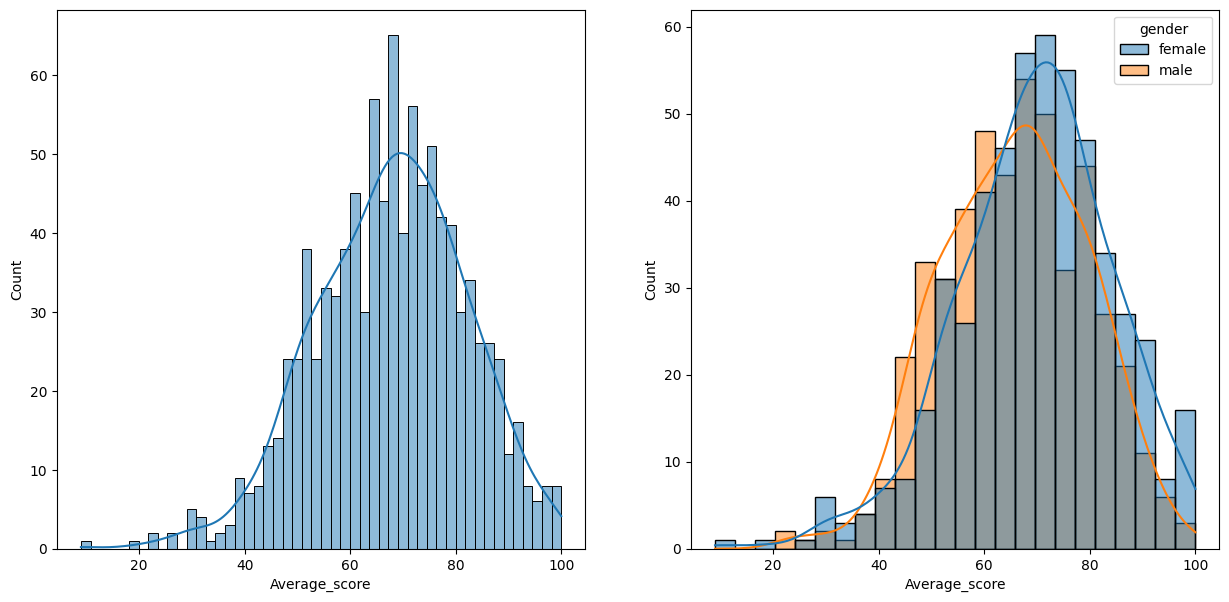

In [45]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='Average_score',bins=50,kde=True)
plt.subplot(122)
sns.histplot(data=data,x='Average_score',kde=True,hue='gender')
plt.show()

## EDA

In [ ]:
for i in cat_cols:
    

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')